In [17]:
df = pd.read_csv("/content/drive/MyDrive/Customer_Churn (1).csv")

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


# Yeni Bölüm

# Yeni Bölüm

# Yeni Bölüm

# Yeni Bölüm

In [18]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.780,2,1,0,149756.710,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.000,2,1,1,10062.800,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.740,4,1,0,119346.880,1
8,9,15792365,He,501,France,Male,44,4,142051.070,2,0,1,74940.500,0
9,10,15592389,H?,684,France,Male,27,2,134603.880,1,1,1,71725.730,0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [20]:
df.isnull().sum().any()

False

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [22]:
df = df.drop(['RowNumber','CustomerId','Surname','Geography','Gender'], axis = 1)

In [23]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.000,1,1,1,101348.880,1
1,608,41,1,83807.860,1,0,1,112542.580,0
2,502,42,8,159660.800,3,1,0,113931.570,1
3,699,39,1,0.000,2,0,0,93826.630,0
4,850,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000,2,1,0,96270.640,0
9996,516,35,10,57369.610,1,1,1,101699.770,0
9997,709,36,7,0.000,1,0,1,42085.580,1
9998,772,42,3,75075.310,2,1,0,92888.520,1


In [24]:
df.sort_values(by="EstimatedSalary", ascending=False)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6646,685,42,2,0.000,2,0,0,199992.480,0
3580,639,41,5,98635.770,1,1,0,199970.740,0
4417,608,27,4,153325.100,1,1,1,199953.330,0
9096,569,37,9,178755.840,1,1,0,199929.170,0
8926,620,28,8,0.000,2,1,1,199909.320,0
...,...,...,...,...,...,...,...,...,...
4989,629,40,9,0.000,1,1,0,106.670,0
5548,710,38,2,0.000,2,1,0,96.270,0
9010,645,59,8,121669.930,2,0,0,91.750,1
9647,625,31,5,0.000,2,0,1,90.070,0


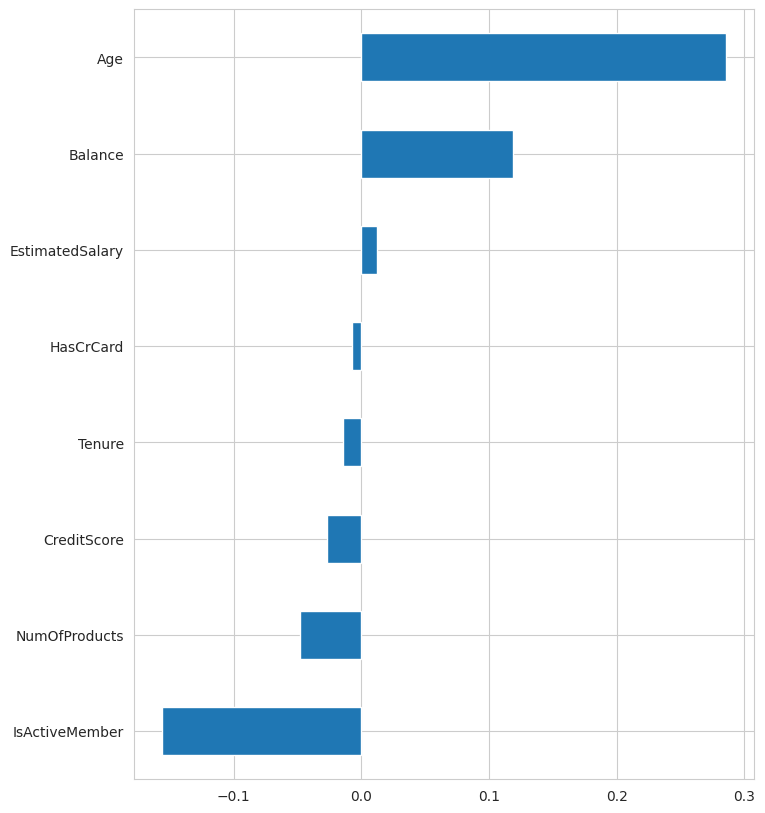

In [25]:
plt.figure(figsize = (8,10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh");

In [26]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

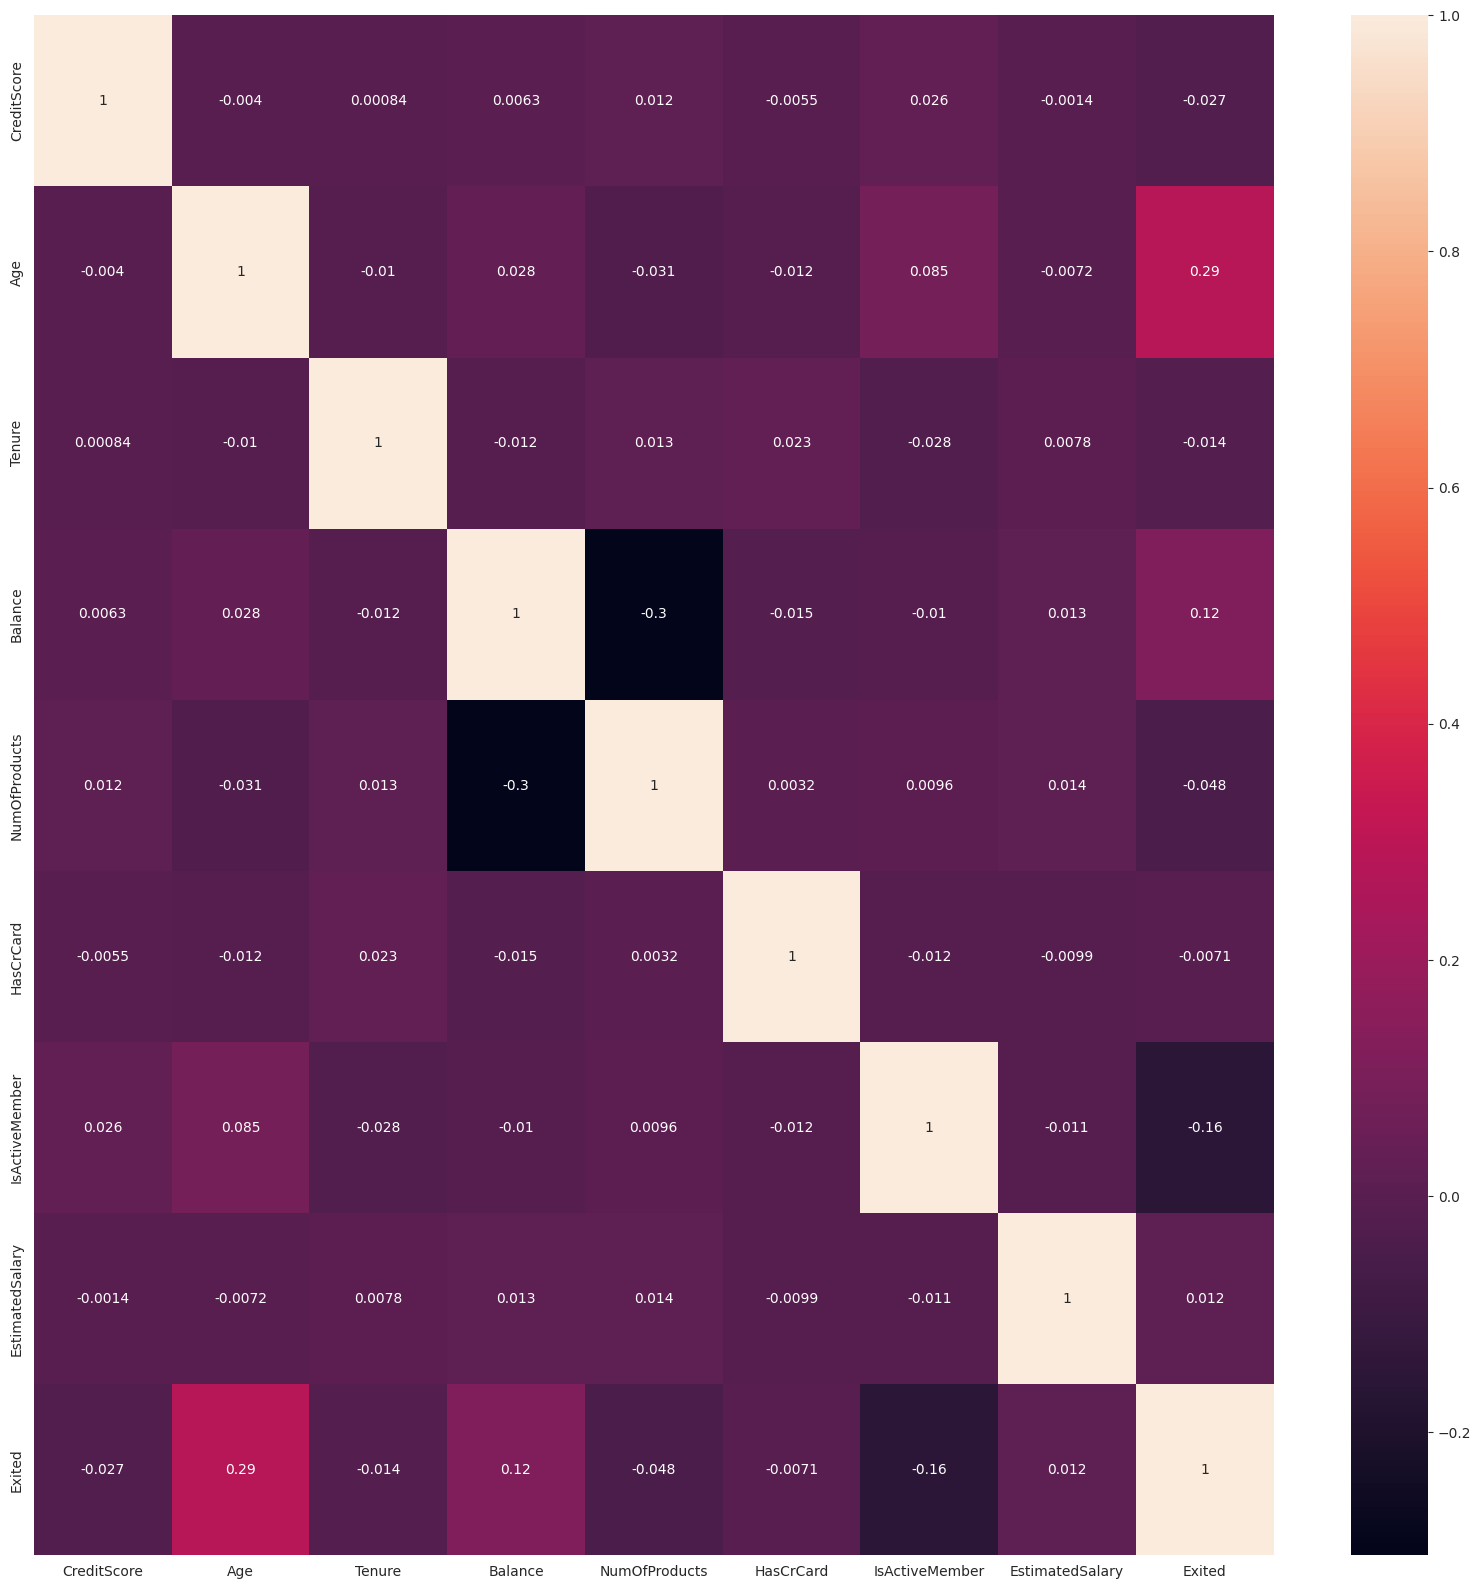

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [29]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10)

In [31]:
scaler = MinMaxScaler()

In [32]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import  roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [34]:
model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [35]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 100, verbose=1)

Epoch 1/100
254/254 [==============================] - 5s 5ms/step - loss: 0.5074 - accuracy: 0.7935 - val_loss: 0.4279 - val_accuracy: 0.8222
Epoch 2/100
254/254 [==============================] - 1s 4ms/step - loss: 0.4664 - accuracy: 0.7935 - val_loss: 0.4074 - val_accuracy: 0.8222
Epoch 3/100
254/254 [==============================] - 1s 4ms/step - loss: 0.4412 - accuracy: 0.8084 - val_loss: 0.3804 - val_accuracy: 0.8544
Epoch 4/100
254/254 [==============================] - 1s 4ms/step - loss: 0.4215 - accuracy: 0.8294 - val_loss: 0.3589 - val_accuracy: 0.8633
Epoch 5/100
254/254 [==============================] - 1s 4ms/step - loss: 0.4017 - accuracy: 0.8384 - val_loss: 0.3414 - val_accuracy: 0.8700
Epoch 6/100
254/254 [==============================] - 1s 4ms/step - loss: 0.3904 - accuracy: 0.8447 - val_loss: 0.3315 - val_accuracy: 0.8844
Epoch 7/100
254/254 [==============================] - 1s 4ms/step - loss: 0.3789 - accuracy: 0.8493 - val_loss: 0.3193 - val_accuracy: 0.8789

In [36]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.507,0.793,0.428,0.822
1,0.466,0.793,0.407,0.822
2,0.441,0.808,0.380,0.854
3,0.422,0.829,0.359,0.863
4,0.402,0.838,0.341,0.870


<Axes: >

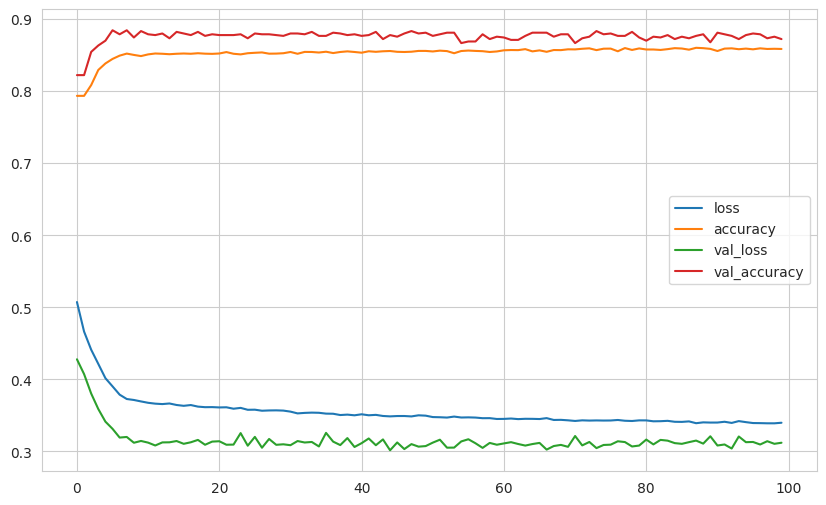

In [37]:
loss_df.plot()

In [38]:
model.evaluate(X_test, y_test, verbose=0)

[0.35190001130104065, 0.8569999933242798]

In [39]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.35190001130104065
accuracy :  0.8569999933242798


In [41]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[774  22]
 [121  83]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.92       796
           1       0.79      0.41      0.54       204

    accuracy                           0.86      1000
   macro avg       0.83      0.69      0.73      1000
weighted avg       0.85      0.86      0.84      1000

